In [1]:
#Weather Analysis

In [4]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [5]:
#Using urllib to access file from a URL
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt',
                           'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x20dcfee3280>)

In [6]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x20dcfeb5a90>)

In [8]:
# To load a fixed-width text file, like this: We can use NumPy's genfromtxt, but we have to prescribe the widths of every field;
# the names of the resulting array columns; their datatypes. 'Uxx' stands for unicode string of length xx; 
#'d' for double precision floating point

In [9]:
stations = np.genfromtxt('stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [10]:
len(stations)

115074

In [11]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

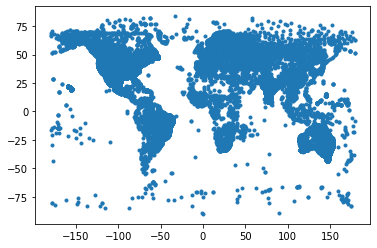

In [14]:
#We can plot Lat and Long using MatplotLib plot function. Define '.' as indicator, or else it'll plot lines
pp.plot(stations['longitude'], stations['latitude'], '.')#, markersize=1)

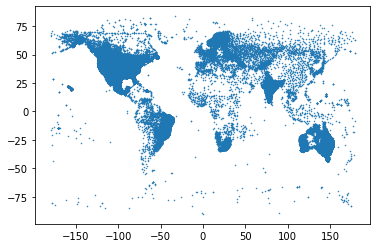

In [15]:
#Refine dot size for clearer visualization
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

In [16]:
#California Stations
stations_ca = stations[stations['state'] == 'CA']

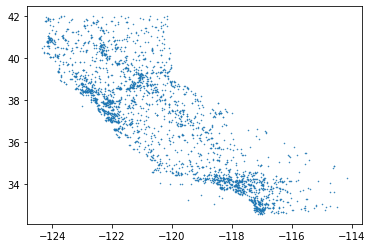

In [17]:
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1)

In [18]:
#Finding stations by name
stations[stations['name'] == 'PASADENA']

array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [19]:
stations[np.char.find(stations['name'], 'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', ''),
       ('USC00046719', 34.1

In [20]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly', 'PASADENA.dly')

('PASADENA.dly', <http.client.HTTPMessage at 0x20dd88f78b0>)

In [24]:
#Custom library to extract imformation from Weather Dataset into an array for further analysis
import getweather

In [25]:
getweather.getyear('PASADENA', ['TMIN','TMAX'], 2000)

array([( 6.1, 14.4), ( 6.1, 18.3), ( 3.9, 18.3), ( 6.1, 20. ),
       ( 6.1, 20.6), ( 5.6, 20. ), ( 5.6, 18.3), ( 3.3, 21.7),
       ( 5. , 20.6), ( 6.1, 18.3), ( 6.7, 18.9), ( 8.3, 17.8),
       ( 7.8, 24.4), (11.1, 26.1), (12.8, 26.1), (13.3, 23.9),
       (13.3, 20.6), (13.9, 24.4), (11.1, 25.6), (12.8, 21.7),
       (11.7, 18.3), (10. , 18.3), ( 7.8, 20. ), (11.7, 22.8),
       (12.2, 21.7), ( 8.3, 20.6), ( 7.2, 20.6), ( 6.1, 21.7),
       ( 6.7, 21.7), (10. , 17.8), (11.1, 16.7), (13.3, 24.4),
       (11.1, 26.7), ( 9.4, 26.7), ( 8.9, 23.9), (10.6, 21.1),
       ( 6.7, 25. ), ( nan,  nan), (15.6, 26.7), (10. , 23.9),
       (10.6, 19.4), ( 5. , 18.3), ( 9.4, 17.8), ( 9.4, 15.6),
       (10.6, 16.7), ( 8.9, 19.4), (10. , 16.7), ( 7.2, 17.2),
       ( 6.1, 22.2), ( 7.8, 25. ), ( 9.4, 23.9), ( 6.7, 13.3),
       ( 7.2, 13.9), ( 7.8, 12.8), ( 2.8, 16.1), ( 8.3, 15. ),
       ( 5.6, 21.7), ( 8.3, 20.6), ( 4.4, 17.2), ( 7.2, 18.3),
       ( 6.7, 19.4), ( 7.2, 22.2), (17.2, 20. ), ( 7.2,

##### We can see Data has missing values
### FILLING MISSING VALUES

In [27]:
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

In [28]:
np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN'])

(nan, nan, nan)

In [29]:
pasadena['TMIN']

array([ 9.4,  8.3,  8.9,  8.3, 10. , 10.6,  7.2,  7.2,  7.8,  6.1,  5.6,
        6.1,  5. ,  3.9,  4.4,  2.8,  5. ,  3.9,  5.6,  7.2,  7.2,  8.9,
        5.6,  6.7,  3.3,  5.6,  3.3,  3.3,  3.3,  3.9,  5. ,  5. ,  6.1,
        nan,  7.2, 13.9, 11.1,  5.6,  2.2,  3.9,  6.1,  3.3,  5.6,  6.1,
        2.8,  2.8,  4.4,  7.8, 10. ,  9.4,  5.6,  5.6,  7.8,  5. ,  3.9,
        6.7,  7.2,  7.8,  6.7,  5. ,  5.6,  8.3,  9.4, 10. ,  9.4, 10. ,
        8.9, 10.6,  6.1,  8.9,  8.3,  7.2,  7.8, 10. , 10. ,  7.8, 10.6,
       13.3, 14.4, 10.6, 11.7, 11.1,  9.4, 10. , 12.2, 10. , 11.1, 12.8,
       12.8, 12.8, 12.2, 11.1, 10.6,  8.3,  8.3,  6.1,  7.2,  3.3, 16.1,
        3.9,  8.9,  7.8,  6.7,  7.2,  7.2,  9.4,  9.4, 12.2, 11.1,  8.9,
        6.1,  7.2, 10. , 10. , 16.1, 12.2, 12.8, 11.7,  nan, 11.1, 11.7,
       12.2, 11.1, 10.6, 11.1, 12.2, 13.3, 15.6, 16.1, 14.4, 13.3, 13.9,
       13.3, 10.6, 13.3, 13.9, 14.4, 15. ,  nan, 11.1, 14.4, 15. , 15.6,
       15. , 15.6, 16.7, 14.4, 14.4, 12.8, 13.9, 15

In [31]:
#No. of missing values in TMIN in Pasadena
np.sum(np.isnan(pasadena['TMIN']))

15

In [32]:
np.nanmin(pasadena['TMIN']), np.nanmax(pasadena['TMAX'])

(2.2, 41.1)

# Missing Values - SUBSTITUTING MEAN

In [33]:
#Substituting NaNs with means
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN'])
pasadena['TMAX'][np.isnan(pasadena['TMAX'])] = np.nanmean(pasadena['TMAX'])

In [34]:
pasadena['TMIN']

array([ 9.4       ,  8.3       ,  8.9       ,  8.3       , 10.        ,
       10.6       ,  7.2       ,  7.2       ,  7.8       ,  6.1       ,
        5.6       ,  6.1       ,  5.        ,  3.9       ,  4.4       ,
        2.8       ,  5.        ,  3.9       ,  5.6       ,  7.2       ,
        7.2       ,  8.9       ,  5.6       ,  6.7       ,  3.3       ,
        5.6       ,  3.3       ,  3.3       ,  3.3       ,  3.9       ,
        5.        ,  5.        ,  6.1       , 11.45314286,  7.2       ,
       13.9       , 11.1       ,  5.6       ,  2.2       ,  3.9       ,
        6.1       ,  3.3       ,  5.6       ,  6.1       ,  2.8       ,
        2.8       ,  4.4       ,  7.8       , 10.        ,  9.4       ,
        5.6       ,  5.6       ,  7.8       ,  5.        ,  3.9       ,
        6.7       ,  7.2       ,  7.8       ,  6.7       ,  5.        ,
        5.6       ,  8.3       ,  9.4       , 10.        ,  9.4       ,
       10.        ,  8.9       , 10.6       ,  6.1       ,  8.9 

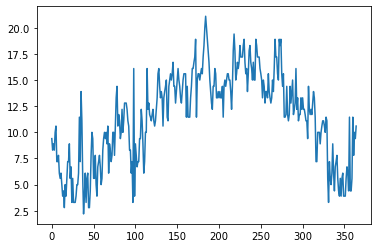

In [35]:
#No more NaNs, lets plot
pp.plot(pasadena['TMIN'])

# Missing Values - INTERPOLATION

In [38]:
#loading again
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

In [39]:
# To interpolate, we select the "good" (non-NaN) TMIN values;
# interpolate "good" days/TMIN to full range of days 

good = ~np.isnan(pasadena['TMIN'])         # tilde in this expression denotes logical notation i.e. T/F output
x = np.arange(0, 365)

np.interp(x, x[good], pasadena['TMIN'][good])

array([ 9.4  ,  8.3  ,  8.9  ,  8.3  , 10.   , 10.6  ,  7.2  ,  7.2  ,
        7.8  ,  6.1  ,  5.6  ,  6.1  ,  5.   ,  3.9  ,  4.4  ,  2.8  ,
        5.   ,  3.9  ,  5.6  ,  7.2  ,  7.2  ,  8.9  ,  5.6  ,  6.7  ,
        3.3  ,  5.6  ,  3.3  ,  3.3  ,  3.3  ,  3.9  ,  5.   ,  5.   ,
        6.1  ,  6.65 ,  7.2  , 13.9  , 11.1  ,  5.6  ,  2.2  ,  3.9  ,
        6.1  ,  3.3  ,  5.6  ,  6.1  ,  2.8  ,  2.8  ,  4.4  ,  7.8  ,
       10.   ,  9.4  ,  5.6  ,  5.6  ,  7.8  ,  5.   ,  3.9  ,  6.7  ,
        7.2  ,  7.8  ,  6.7  ,  5.   ,  5.6  ,  8.3  ,  9.4  , 10.   ,
        9.4  , 10.   ,  8.9  , 10.6  ,  6.1  ,  8.9  ,  8.3  ,  7.2  ,
        7.8  , 10.   , 10.   ,  7.8  , 10.6  , 13.3  , 14.4  , 10.6  ,
       11.7  , 11.1  ,  9.4  , 10.   , 12.2  , 10.   , 11.1  , 12.8  ,
       12.8  , 12.8  , 12.2  , 11.1  , 10.6  ,  8.3  ,  8.3  ,  6.1  ,
        7.2  ,  3.3  , 16.1  ,  3.9  ,  8.9  ,  7.8  ,  6.7  ,  7.2  ,
        7.2  ,  9.4  ,  9.4  , 12.2  , 11.1  ,  8.9  ,  6.1  ,  7.2  ,
      

In [40]:
# fill NaNs in any array by interpolation

def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])

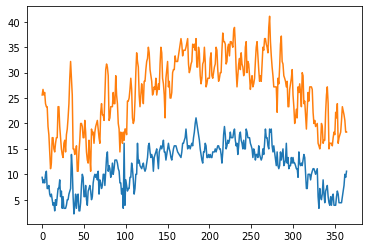

In [41]:
pp.plot(fillnans(pasadena['TMIN']))
pp.plot(fillnans(pasadena['TMAX']))

In [46]:
pasadena['TMIN'], pasadena['TMAX'] = fillnans(pasadena['TMIN']), fillnans(pasadena['TMAX'])

#### Now, let us consider only TMIN data

In [47]:
np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN'])

(11.47068493150685, 2.2, 21.1)

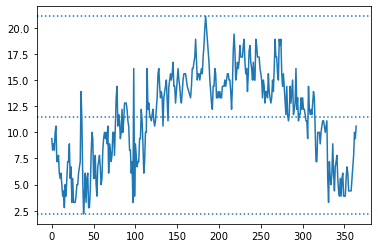

In [49]:
pp.plot(pasadena['TMIN'])

# plot dotted lines at mean, min, and max of TMIN data for a cleaner look
for value in [np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN'])]:
    pp.axhline(value, linestyle=':')

In [50]:
mean, err = np.mean(pasadena['TMIN']), math.sqrt(np.var(pasadena['TMIN']))

#### Mean and variance are computed in NumPy with NP Mean and NP Var, we can plot the time series again using the mean and the mean minus and plus the standard deviation as references.

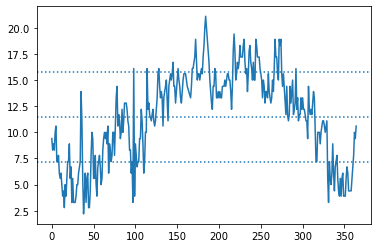

In [51]:
pp.plot(pasadena['TMIN'])

# plot horizontal lines at mean, mean - std error, and mean + std error
for value in [mean, mean - err, mean + err]:
    pp.axhline(value, linestyle=':')

### Let's look at rain

In [52]:
rain = getweather.getyear('PASADENA', ['PRCP'], 2001)['PRCP']

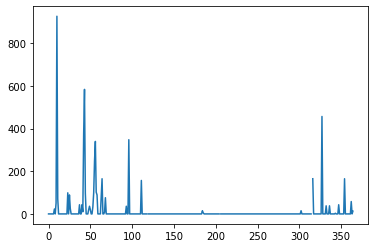

In [53]:
pp.plot(rain)

#### To get rid of noise and see underlying trends in data, we can apply
# EXPONENTIAL SMOOTHING
#### the simplest approach to smoothing is replacing each value with the average of a set of its neighbors. With NumPy we can do this with correlate.

In [55]:
#To smooth our temperature series we will use an even simpler mask, uniform values normalized so that they sum to one.
np.ones(10) / 10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

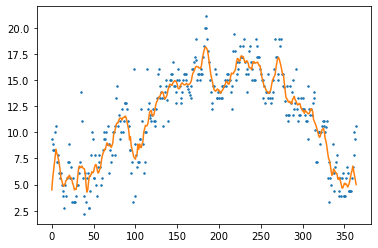

In [56]:
# TMIN data, smoothed with uniform mask of length 10;
# perform partial correlation on boundaries (mode = "same")

pp.plot(pasadena['TMIN'], '.', ms=3)
pp.plot(np.correlate(pasadena['TMIN'], np.ones(10)/10, 'same'))

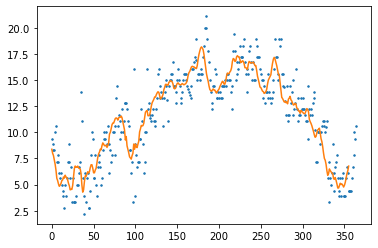

In [57]:
# drop boundary values that cannot be fully correlated, as boundry values don't have any neighbors for smoothing
pp.plot(pasadena['TMIN'], '.', ms=3)
pp.plot(np.correlate(pasadena['TMIN'], np.ones(10)/10, 'valid'))

In [59]:
# Defining our function to smooth any array with a window

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

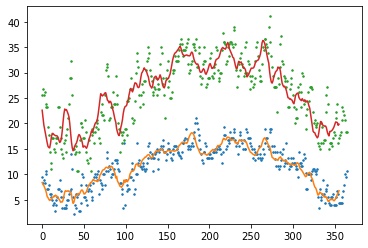

In [62]:
#Smooth and plot TMIN and TMAX for Pasadena
pp.plot(pasadena['TMIN'], '.', ms=3)
pp.plot(smooth(pasadena['TMIN'], 10))

pp.plot(pasadena['TMAX'], '.', ms=3)
pp.plot(smooth(pasadena['TMAX'], 10))

### My user-defined function for plot smoothing

In [65]:
# load TMIN and TMAX data for a station and year; fill NaNs;
# plot unsmoothed data as dots, smoothed data as lines,
# dropping boundary values and adjusting x axis consistently

def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    for obs in ['TMIN','TMAX']:   
        stationdata[obs] = fillnans(stationdata[obs])
    
        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10,356), smooth(stationdata[obs], 20))
    
    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

(1.0, 365.0, 15.0, 30.0)

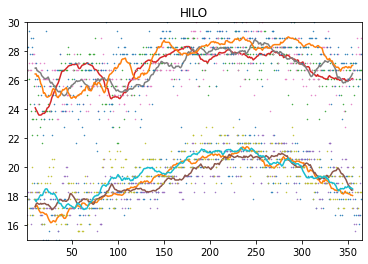

In [69]:
# For smooth TMIN and TMAX, We can now use this function across any 'Station' and any year
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

pp.axis(ymin=15,ymax=30)

Using ('USW00094728', 40.7789, -73.9692, 39.6, 'NY', 'NEW YORK CNTRL PK TWR', '', 'HCN', '72506').
Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').
Using ('USW00014922', 44.8831, -93.2289, 265.8, 'MN', 'MINNEAPOLIS/ST PAUL AP', 'GSN', 'HCN', '72658').


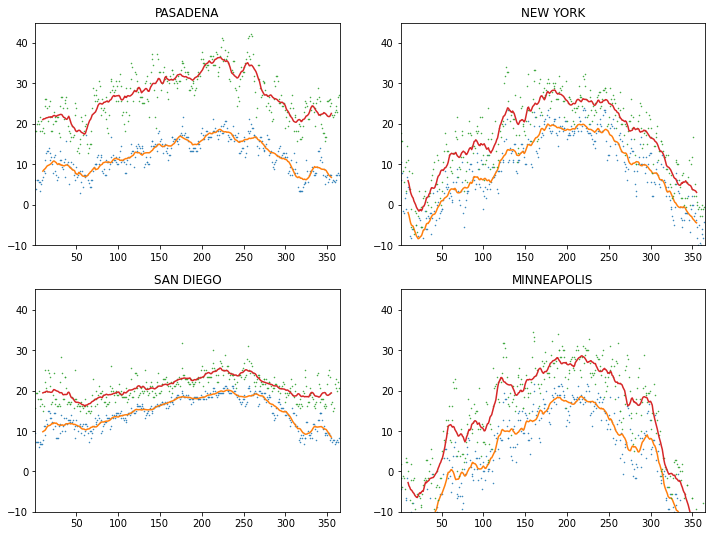

In [70]:
# plot four cities in a two-by-two grid

pp.figure(figsize=(12,9))

for i, city in enumerate(['PASADENA','NEW YORK','SAN DIEGO','MINNEAPOLIS']):
    pp.subplot(2,2,i+1)
    plotsmooth(city, 2000)